In [1]:
import numpy as np 
import pandas as pd
import calendar
import math

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filenames = ['properties/properati-AR-2016-01-01-properties-sell.csv', 
            'properties/properati-AR-2016-02-01-properties-sell.csv',
            'properties/properati-AR-2016-03-01-properties-sell.csv',
            'properties/properati-AR-2016-04-01-properties-sell.csv',
            'properties/properati-AR-2016-05-01-properties-sell.csv',
            'properties/properati-AR-2016-06-01-properties-sell.csv',
            'properties/properati-AR-2016-07-01-properties-sell.csv',
            'properties/properati-AR-2016-08-01-properties-sell.csv',
            'properties/properati-AR-2016-09-01-properties-sell.csv',
            'properties/properati-AR-2016-10-01-properties-sell.csv',
            'properties/properati-AR-2016-11-01-properties-sell.csv',
            'properties/properati-AR-2016-12-01-properties-sell.csv']

dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

In [3]:
#Uno los dataframe
data = pd.DataFrame()
for dataframe in dataframes:
    data = pd.concat([data, dataframe]).drop_duplicates().reset_index(drop=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143251 entries, 0 to 143250
Data columns (total 27 columns):
id                            143251 non-null object
created_on                    143251 non-null object
operation                     143251 non-null object
property_type                 143251 non-null object
place_name                    143229 non-null object
place_with_parent_names       143251 non-null object
country_name                  143251 non-null object
state_name                    143251 non-null object
geonames_id                   121249 non-null float64
lat-lon                       113825 non-null object
lat                           113825 non-null float64
lon                           113825 non-null float64
price                         131660 non-null float64
currency                      121378 non-null object
price_aprox_local_currency    131660 non-null float64
price_aprox_usd               131660 non-null float64
surface_total_in_m2           91221

In [5]:
test = pd.read_csv('properati_dataset_testing_noprice.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 17 columns):
id                         14166 non-null int64
created_on                 14166 non-null object
property_type              14166 non-null object
operation                  14166 non-null object
place_name                 14166 non-null object
place_with_parent_names    14166 non-null object
country_name               14166 non-null object
state_name                 14166 non-null object
lat-lon                    10487 non-null object
lat                        10487 non-null float64
lon                        10487 non-null float64
surface_total_in_m2        11853 non-null float64
surface_covered_in_m2      13005 non-null float64
floor                      1368 non-null float64
rooms                      7500 non-null float64
expenses                   2543 non-null object
description                14166 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage: 1

<br><B><FONT FACE="Arial" SIZE="5">Prediccion usando regresion lineal, en base a las propiedades: 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms'</FONT></B><br/>

In [6]:
data_float = data.loc[:, ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']].dropna(axis= 0, how='any')
#test_float = test.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2']].dropna(axis= 0, how='any')

#filtro
data_float = data_float.loc[(data_float.surface_total_in_m2 >= 42.0) & (data_float.surface_total_in_m2 <= 88.0), :]
#test_float = test_float.loc[(test_float.surface_total_in_m2 >= 42.0) & (test_float.surface_total_in_m2 <= 88.0), :]


data_float = data_float.loc[(data_float.surface_covered_in_m2 >= 39.0) & (data_float.surface_covered_in_m2 <= 80.0), :]
#test_float = test_float.loc[(test_float.surface_covered_in_m2 >= 39.0) & (test_float.surface_covered_in_m2 <= 80.0), :]

#data_float = data_float.loc[(data_float.floor >= 1.0) & (data_float.floor <= 6.0), :]
#test_float = test_float.loc[(test_float.floor >= 1.0) & (test_float.floor <= 6.0), :]

#data_float = data_float.loc[(data_float.rooms >= 1.0) & (data_float.rooms <= 3.0), :]
#test_float = test_float.loc[(test_float.rooms >= 1.0) & (test_float.rooms <= 3.0), :]


data_float.describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,104273.583120,59.533563,53.976334,4.287005,2.460843
std,58749.815472,12.380646,11.313893,6.037320,0.653951
min,0.000000,42.000000,39.000000,1.000000,1.000000
25%,77000.000000,49.000000,45.000000,2.000000,2.000000
50%,99000.000000,57.000000,50.000000,3.000000,2.000000
75%,135000.000000,70.000000,62.000000,6.000000,3.000000
max,900000.000000,88.000000,80.000000,221.000000,5.000000


In [7]:
data_float.shape

(2324, 5)

In [8]:
#Creo X e Y
feature_cols = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']
X = data_float[feature_cols]
y = data_float.price_aprox_usd

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# Printeo los coeficientes
print lm.intercept_
print lm.coef_


863.930023475
[  520.59179757  1291.64796161   664.91509428   -61.74610688]


In [9]:
# Uno los coeficientes con su respectiva columna
zip(feature_cols, lm.coef_)

[('surface_total_in_m2', 520.59179757040567),
 ('surface_covered_in_m2', 1291.6479616051245),
 ('floor', 664.91509428349582),
 ('rooms', -61.746106882551217)]

In [10]:
test.shape

(14166, 17)

In [11]:
test_float = test
test_float.fillna(0, inplace=True)
test_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 17 columns):
id                         14166 non-null int64
created_on                 14166 non-null object
property_type              14166 non-null object
operation                  14166 non-null object
place_name                 14166 non-null object
place_with_parent_names    14166 non-null object
country_name               14166 non-null object
state_name                 14166 non-null object
lat-lon                    14166 non-null object
lat                        14166 non-null float64
lon                        14166 non-null float64
surface_total_in_m2        14166 non-null float64
surface_covered_in_m2      14166 non-null float64
floor                      14166 non-null float64
rooms                      14166 non-null float64
expenses                   14166 non-null object
description                14166 non-null object
dtypes: float64(6), int64(1), object(10)
memory usage

In [12]:
test_float['price_aprox_usd_LR'] = lm.predict(test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']])
test_float.head()
#PREGUNTAS
#HAY QUE FILTRAR EL .CSV QUE TENEMOS QUE PREDECIR? HAY DATOS TRUCHOS
#USANDO REGRESION, HAGO LA PREDDCION DE LAS PROPIEDADES QUE SOLAMENTE TIENEN LAS 4 COLUMNAS CON DATOS POR LAS QUE HAGO LA PREDICCION?

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,price_aprox_usd_LR
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,0.0,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,863.930023
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,El departamento cuenta con un living-comedor a...,863.930023
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,90454.397452
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,39.0,39.0,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,71541.280631
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,51.0,51.0,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,93288.157741


<br><B><FONT FACE="Arial" SIZE="5">KNN</FONT></B><br/>

In [13]:
#Un ejemplo de knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X, y)

test_float['price_aprox_usd_KNN'] = knn.predict(test_float.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']])
test_float.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,price_aprox_usd_LR,price_aprox_usd_KNN
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,0.0,0.0,0.0,0,Edificio BA Houses situado frente al Dique 3 d...,863.930023,65000.000
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,El departamento cuenta con un living-comedor a...,863.930023,65000.000
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500,IMPECABLE TORRE COY III – DEPA...,90454.397452,90000.000
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,39.0,39.0,0.0,0.0,0,AMBIENTE DIVISIBLE CON PISOS D...,71541.280631,61537.270
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,0,0.000000,0.000000,51.0,51.0,0.0,0.0,0,LIVING COMEDOR CON PISOS DE PO...,93288.157741,250195.914


In [25]:
#Knn con cross-validation
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1,100))


# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())



The optimal number of neighbors is 68


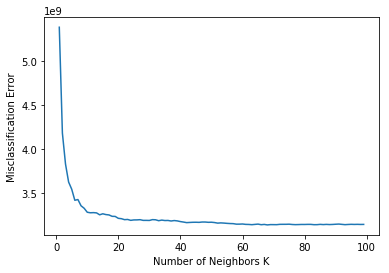

In [28]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()